In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import solve_ivp

# Reloading the module
import importlib

import OrthogonalPolynomials
importlib.reload(OrthogonalPolynomials)
from OrthogonalPolynomials import *

import GeneralFunctionality
importlib.reload(GeneralFunctionality)
from GeneralFunctionality import *

import Potential2D
importlib.reload(Potential2D)
from Potential2D import *

from scipy.special import eval_legendre, roots_legendre
from scipy import integrate

In [2]:
# Collocation points
N = 20
M = 20
x_GL = ChebyshevGaussLobattoNodes_Reversed(N)
y_GL = ChebyshevGaussLobattoNodes_Reversed(M)
Dx = ChebyshevDiffMatrix(x_GL)
Dy = ChebyshevDiffMatrix(y_GL)
w_bary_x = BarycentricWeights(x_GL)
w_bary_y = BarycentricWeights(y_GL)
D2x = PolynomialDiffMatrix_HighOrder(2, x_GL, w_bary_x, Dx)
D2y = PolynomialDiffMatrix_HighOrder(2, y_GL, w_bary_y, Dy)

In [3]:
# Solution matrix, source term
# u: u_{ij} solution at x[i], y[j]
u = np.zeros((N+1,M+1))
x_GL_mesh, y_GL_mesh = np.meshgrid(x_GL, y_GL)
#s = np.sin(np.pi*(x_GL_mesh+1)/2) * np.sin(np.pi*(y_GL_mesh+1)/2)
s = - 4 + 2 * (x_GL_mesh**2 + y_GL_mesh**2) 

In [4]:
# Generating the RHS for direct solution
rhs = np.zeros((N+1,M+1))
for i in range(1,N): # i = 1,...,N-1
    for j in range(1,M): # j = 1,...,M-1
        rhs[i,j] = s[i,j] - D2x[i,0] * u[0,j] - D2x[i,N] * u[N,j] \
                          - D2y[j,0] * u[i,0] - D2y[j,M] * u[i,M]

In [5]:
# Solving the system
u[1:N, 1:M] = MatEqnSolver(D2x[1:N, 1:N], D2y[1:M, 1:M].T, s[1:N, 1:M], N-1, M-1)

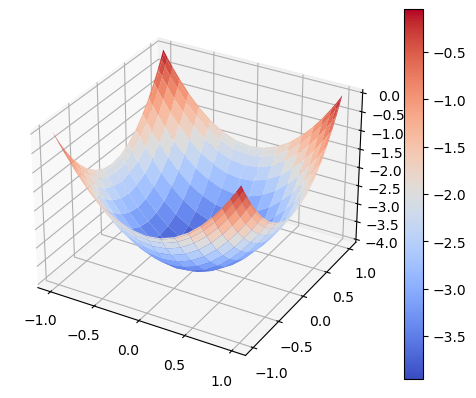

In [6]:
# Plot the source
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x_GL_mesh, y_GL_mesh, s, cmap=cm.coolwarm)
fig.colorbar(surf)

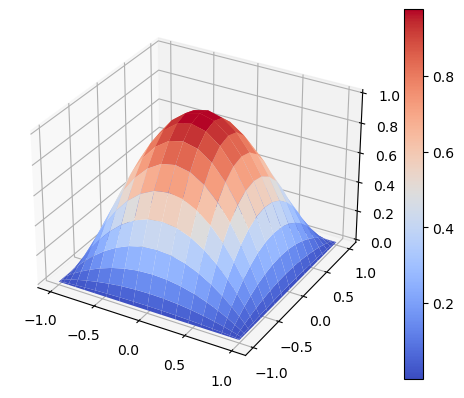

In [7]:
# Plot the solution
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x_GL_mesh, y_GL_mesh, u, cmap=cm.coolwarm)
fig.colorbar(surf)

5.995204332975845e-15


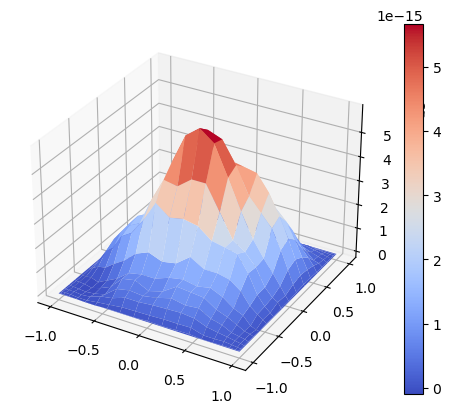

In [8]:
# Plot the error
u_exact = (1-x_GL_mesh**2) * (1-y_GL_mesh**2)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x_GL_mesh, y_GL_mesh, u-u_exact, cmap=cm.coolwarm)
print(np.max(np.abs(u-u_exact)))
fig.colorbar(surf)

## Using the Kronecker product

In [9]:
# Collocation points
N = 20
M = 20
x_GL = ChebyshevGaussLobattoNodes_Reversed(N)
y_GL = ChebyshevGaussLobattoNodes_Reversed(M)
Dx = ChebyshevDiffMatrix(x_GL)
Dy = ChebyshevDiffMatrix(y_GL)
w_bary_x = BarycentricWeights(x_GL)
w_bary_y = BarycentricWeights(y_GL)
D2x = PolynomialDiffMatrix_HighOrder(2, x_GL, w_bary_x, Dx)
D2y = PolynomialDiffMatrix_HighOrder(2, y_GL, w_bary_y, Dy)

# Solution matrix, source term
# u: u_{ij} solution at x[i], y[j]
u = np.zeros((N+1,M+1))
x_GL_mesh, y_GL_mesh = np.meshgrid(x_GL, y_GL)
#s = np.sin(np.pi*(x_GL_mesh+1)/2) * np.sin(np.pi*(y_GL_mesh+1)/2)
s = - 4 + 2 * (x_GL_mesh**2 + y_GL_mesh**2) 

# Generating the RHS for direct solution
rhs = np.zeros((N+1,M+1))
for i in range(1,N): # i = 1,...,N-1
    for j in range(1,M): # j = 1,...,M-1
        rhs[i,j] = s[i,j] - D2x[i,0] * u[0,j] - D2x[i,N] * u[N,j] \
                          - D2y[j,0] * u[i,0] - D2y[j,M] * u[i,M]
        
# Solving the system
u[1:N, 1:M] = MatEqnSolver(D2x[1:N, 1:N], D2y[1:M, 1:M].T, s[1:N, 1:M], N-1, M-1, Converter=MatEqnConverter2)

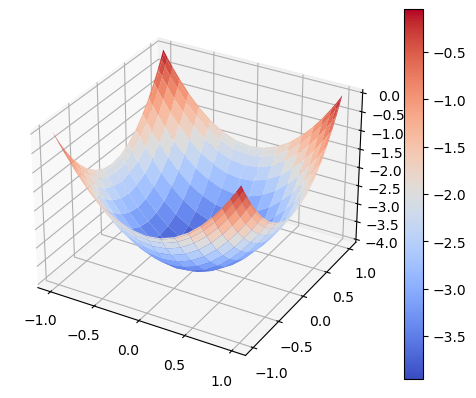

In [10]:
# Plot the source
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x_GL_mesh, y_GL_mesh, s, cmap=cm.coolwarm)
fig.colorbar(surf)

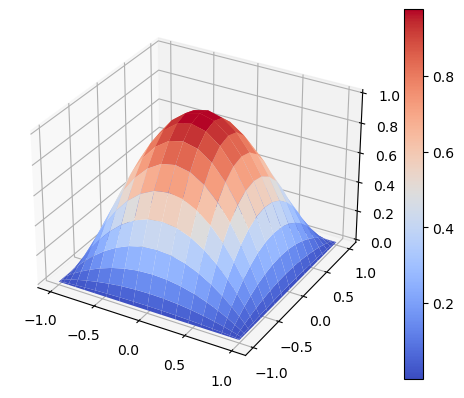

In [11]:
# Plot the solution
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x_GL_mesh, y_GL_mesh, u, cmap=cm.coolwarm)
fig.colorbar(surf)

5.995204332975845e-15


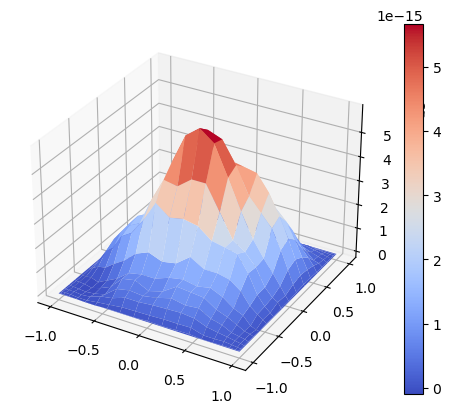

In [12]:
# Plot the error
u_exact = (1-x_GL_mesh**2) * (1-y_GL_mesh**2)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x_GL_mesh, y_GL_mesh, u-u_exact, cmap=cm.coolwarm)
print(np.max(np.abs(u-u_exact)))
fig.colorbar(surf)